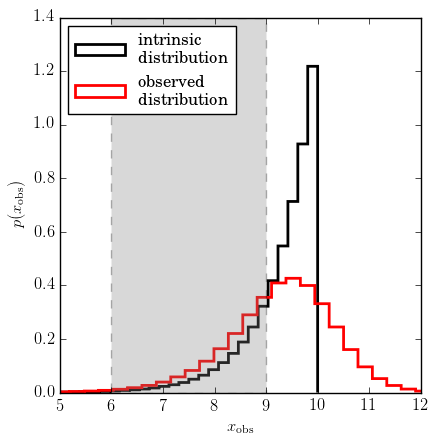

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.stats.random import trunc_exp 
from astroML.plotting import setup_text_plots # Latex in plots
setup_text_plots(fontsize=12, usetex=True)

#------------------------------------------------------------
# Sample from a truncated exponential distribution
N = 1E6
N=int(N)
hmin =6 # Distribution limits
hmax = 9 # Distribution limits
k = 0.6 * np.log(10)
dist_l = 1; dist_h = 10
true_dist = trunc_exp(dist_l, # Truncated exponential in python's astroML
                      dist_h,
                      k)

# draw the true distributions and heteroscedastic noise
np.random.seed(0)
h_true = true_dist.rvs(N) #True dist
dh = 0.5 * (1 + np.random.random(N))
h_obs = np.random.normal(h_true, dh) #adding random_noise


fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.12, right=0.95, wspace=0.3,
                    bottom=0.15, top=0.9)
ax = fig.add_subplot(121)

ax.hist(h_true, histtype='step', color='k', linewidth=2., bins=50,label="intrinsic\ndistribution", normed=True)
ax.hist(h_obs, histtype='step', color='r', linewidth=2., bins=50,label="observed\ndistribution", normed=True)

#x_pdf = np.linspace(dist_l, dist_h, 1000) # Ploting the pdf
#plt.plot(x_pdf, true_dist.pdf(x_pdf), '-r',
#        label='true distribution')

ax.add_patch(plt.Rectangle((hmin, 0), hmax - hmin, 1.4,
                           fc='gray', ec='k', linestyle='dashed',
                           alpha=0.3))         

ax.set_xlabel(r'$x_{\rm obs}$')
ax.set_ylabel(r'$p(x_{\rm obs})$')
ax.set_xlim(5,12)         
ax.legend(loc="upper left")
plt.show()

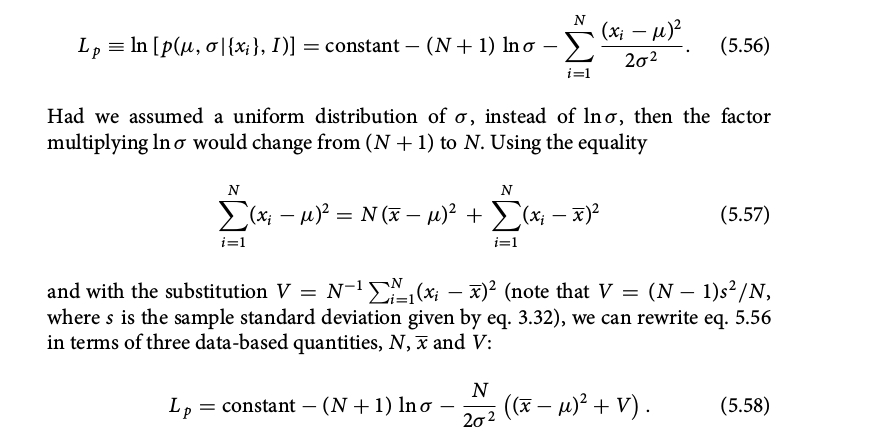

In [12]:
from IPython.display import Image
Image("Exmpl_L.jpg",width=800)

In [39]:
def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
lebgth = 1000
sigma = np.linspace(1, 5, lebgth)
mu = np.linspace(-3, 5, lebgth)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma, mu)
logL -= logL.max()

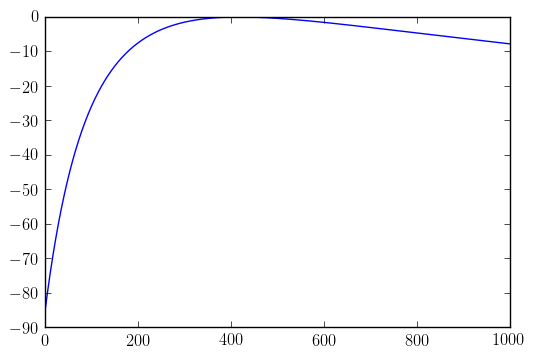

In [40]:
plt.plot(logL)
plt.show()